In [53]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

In [54]:
from textblob import TextBlob
df = pd.read_csv("/content/corona.csv", encoding= 'unicode_escape')

In [55]:
df.head()

,Text
0,#Coronavirus precautions and safety measures !...
1,@narendramodi @BJP4India @sanjayjaiswalMP @PMO...
2,56% of new #CoronaVirus cases reported in Indi...
3,#COVID2019 #coronavirus #CoronavirusPandemic #...
4,#SmartValue donating food for needy in pochanp...


In [56]:
polarity_score = []

for i in range(0,df.shape[0] ):
    score = TextBlob(df.iloc[i][0])
    score1 = score.sentiment[0]
    polarity_score.append(score1)

In [57]:
df = pd.concat([df, pd.Series(polarity_score)] , axis=1 )

In [58]:
df

,Text,0
0,#Coronavirus precautions and safety measures !...,0.000000
1,@narendramodi @BJP4India @sanjayjaiswalMP @PMO...,0.000000
2,56% of new #CoronaVirus cases reported in Indi...,0.031061
3,#COVID2019 #coronavirus #CoronavirusPandemic #...,0.000000
4,#SmartValue donating food for needy in pochanp...,-0.031818
...,...,...
4889,This is the best... Lock down cricket. @Shashi...,0.422222
4890,My Son 25 waits for modiji speeches follo...,-0.155556
4891,Sir in our colony Dehradun Shamshergarh peopl...,-0.116667
4892,Meanwhile in Dehradun Uttarakhand India. Ele...,0.000000


In [59]:
print("duplicate count: {}".format(df.isnull().sum().sum()))

duplicate count: 0


In [60]:
df.rename(columns={df.columns[1]  :"Polarity"}, inplace = True )

In [61]:
df.head()

,Text,Polarity
0,#Coronavirus precautions and safety measures !...,0.000000
1,@narendramodi @BJP4India @sanjayjaiswalMP @PMO...,0.000000
2,56% of new #CoronaVirus cases reported in Indi...,0.031061
3,#COVID2019 #coronavirus #CoronavirusPandemic #...,0.000000
4,#SmartValue donating food for needy in pochanp...,-0.031818


In [62]:
def text_category(p):
  if p > 0:
    return "positive"
  elif p < 0:
    return "negative"
  else:
    return "neutral"

In [63]:
df["score"] = df["Polarity"].apply(text_category)
df

,Text,Polarity,score
0,#Coronavirus precautions and safety measures !...,0.000000,neutral
1,@narendramodi @BJP4India @sanjayjaiswalMP @PMO...,0.000000,neutral
2,56% of new #CoronaVirus cases reported in Indi...,0.031061,positive
3,#COVID2019 #coronavirus #CoronavirusPandemic #...,0.000000,neutral
4,#SmartValue donating food for needy in pochanp...,-0.031818,negative
...,...,...,...
4889,This is the best... Lock down cricket. @Shashi...,0.422222,positive
4890,My Son 25 waits for modiji speeches follo...,-0.155556,negative
4891,Sir in our colony Dehradun Shamshergarh peopl...,-0.116667,negative
4892,Meanwhile in Dehradun Uttarakhand India. Ele...,0.000000,neutral


In [64]:
category = df.groupby(['score']).size()
category

score
negative     968
neutral     1512
positive    2414
dtype: int64

<Axes: >

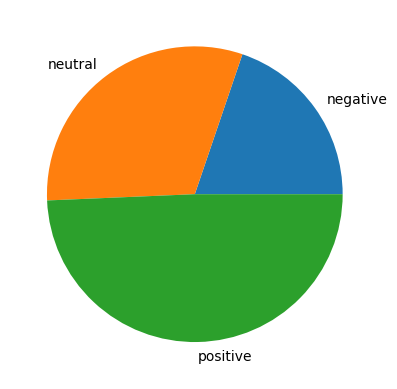

In [65]:
category.plot(kind='pie', y='score')

<Axes: xlabel='score'>

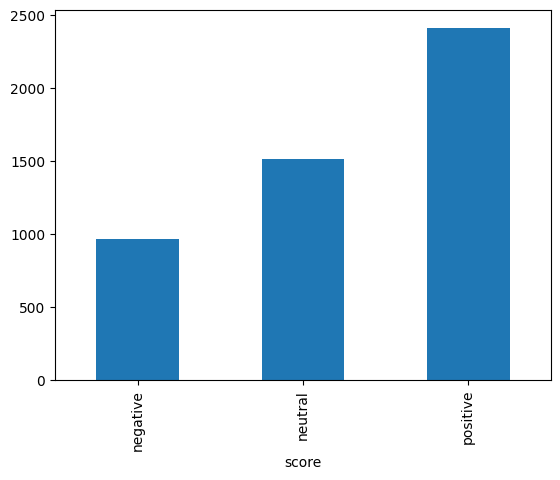

In [66]:
category.plot(kind='bar', y='score')

In [67]:
df = df[df['score'] != 'neutral']
df

,Text,Polarity,score
2,56% of new #CoronaVirus cases reported in Indi...,0.031061,positive
4,#SmartValue donating food for needy in pochanp...,-0.031818,negative
5,Full form of #WHO : #Wuhan Helth Organization ...,0.350000,positive
7,#Tablighijammat in last 72 hrs 56%increase in ...,-0.072222,negative
9,Our PM @narendramodi ji should share this vide...,0.300000,positive
...,...,...,...
4888,@realDonaldTrump @hvgoenka @narendramodi @BBCE...,0.366667,positive
4889,This is the best... Lock down cricket. @Shashi...,0.422222,positive
4890,My Son 25 waits for modiji speeches follo...,-0.155556,negative
4891,Sir in our colony Dehradun Shamshergarh peopl...,-0.116667,negative


In [68]:
df['scoremap'] = df["score"].map( lambda score: 1 if score == "positive" else 0)
df

,Text,Polarity,score,scoremap
2,56% of new #CoronaVirus cases reported in Indi...,0.031061,positive,1
4,#SmartValue donating food for needy in pochanp...,-0.031818,negative,0
5,Full form of #WHO : #Wuhan Helth Organization ...,0.350000,positive,1
7,#Tablighijammat in last 72 hrs 56%increase in ...,-0.072222,negative,0
9,Our PM @narendramodi ji should share this vide...,0.300000,positive,1
...,...,...,...,...
4888,@realDonaldTrump @hvgoenka @narendramodi @BBCE...,0.366667,positive,1
4889,This is the best... Lock down cricket. @Shashi...,0.422222,positive,1
4890,My Son 25 waits for modiji speeches follo...,-0.155556,negative,0
4891,Sir in our colony Dehradun Shamshergarh peopl...,-0.116667,negative,0


In [69]:
(X, y) = df['Text'], df['scoremap']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [73]:
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
trigram_vectorizer.fit_transform(X)

<3382x55884 sparse matrix of type '<class 'numpy.int64'>'
	with 102220 stored elements in Compressed Sparse Row format>

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
trigram_vectorizer = CountVectorizer(ngram_range=(2, 3))
trigram_vectorizer.fit_transform(X.values)

X_trigram = trigram_vectorizer.transform(X)


def train_and_show_scores(X, y, title: str) -> None:
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, train_size=0.80, stratify=y
    )

    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(len(y_pred))
    print(len(y_valid))
    cm = confusion_matrix(y_valid, y_pred, labels=clf.classes_)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    # disp.plot()
    # plt.show()
    # print(cm)
    train_score = clf.score(X_train, y_train)
    valid_score = clf.score(X_valid, y_valid)
    print(f'{title}\nTrain score: {round(train_score, 2)} ; Test score: {round(valid_score, 2)}\n')

677
677
[[132  62]
 [  6 477]]


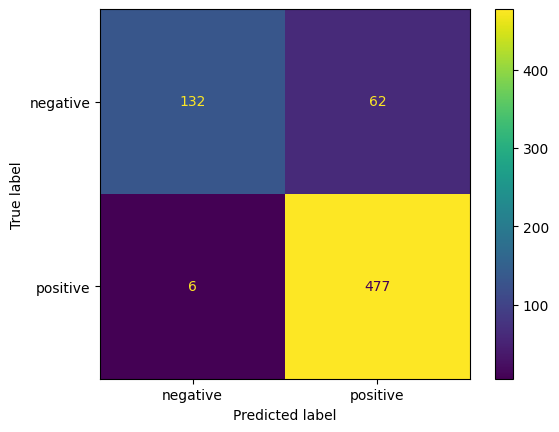

sentiment
Train score: 1.0 ; Test score: 0.9



In [93]:
train_and_show_scores(X_trigram, df['score'], title="sentiment")

In [76]:
import re
stra=[]
searchlist=['Corona','Good','useful','good','stayhome']
cleandata=df['Text'].tolist()
for s in searchlist:
    for i in cleandata:
        searchdata=re.compile(s)
        if searchdata.search(i):
            stra.append(i)

In [77]:
(pd.Series(stra))

0       56% of new #CoronaVirus cases reported in Indi...
1       #SmartValue donating food for needy in pochanp...
2       Our PM @narendramodi ji should share this vide...
3       Being a Muslim in #India  China and Kashmir is...
4                 Great song Jai hind #IndiaFightsCorona 
                              ...                        
1125    Meet Nikhil he is a mischievous fun loving per...
1126    #darubadnaam #quarantine #days #lockdown #2020...
1127    Super glad to be in this ensemble What a lineu...
1128    The most relatable video you??ll watch today ...
1129    The most relatable video you??ll watch today ...
Length: 1130, dtype: object

In [78]:
import re
stra=[]
searchlist=['Death','virus','bad','infected']
cleandata=df['Text'].tolist()
for s in searchlist:
    for i in cleandata:
        searchdata=re.compile(s)
        if searchdata.search(i):
            stra.append(i)

In [79]:
(pd.Series(stra))

0       Things that COVID19 made clear * Health profes...
1       #CODVID19 Today corona virus effect very dange...
2       NDTV News: Coronavirus Live Updates: Over 600 ...
3       #CODVID19 Today corona virus effect very dange...
4       Death toll due to #COVID19 rises to 68 in Indi...
                              ...                        
1075    @mybmc @CMOMaharashtra Nowadays  Corona virus ...
1076    India's biggest Bollywood star  Shah Rukh Khan...
1077    I checked withmy colleagues working for ngo  s...
1078    This is d selectivity that's a problem. We tho...
1079    @JBPritzker To curb community spreading of cov...
Length: 1080, dtype: object

In [103]:
import re
stra=[]
newdata=[]

cleandata=df['Text'].tolist()
mainsearch=['corona']
for s in mainsearch:
    for i in cleandata:
        searchdata=re.compile(s)
        if searchdata.search(i):
            newdata.append(i)

searchlist=['Good','fight','lockdown','stay home']
for s in searchlist:
    for i in newdata:
        searchdata=re.compile(s)
        if searchdata.search(i):
            stra.append(i)

In [104]:
(pd.Series(stra))

0      our pm @narendramodi ji should share this vide...
1      being a muslim in #india  china and kashmir is...
2                great song jai hind #indiafightscorona 
3      #remote learning #online #classes are what ens...
4      @iamsrk sir we are glad to have you as our fav...
                             ...                        
934    good morning everyone stay home today and save...
935    stay home be safe #itscoronatime #chinesevirus...
936    stay home be safe #itscoronatime #chinesevirus...
937    stay home   stay safe #indiafightscorona #indi...
938    dear all  as you can see this attached photo ....
Length: 939, dtype: object

In [102]:
import re
stra=[]
newdata=[]

cleandata=df['Text'].tolist()
mainsearch=['corona']
for s in mainsearch:
    for i in cleandata:
        searchdata=re.compile(s)
        if searchdata.search(i):
            newdata.append(i)

searchlist=['Death','virus','bad','infected']
for s in searchlist:
    for i in newdata:
        searchdata=re.compile(s)
        if searchdata.search(i):
            stra.append(i)

In [97]:
(pd.Series(stra))

0       56% of new #coronavirus cases reported in indi...
1       #smartvalue donating food for needy in pochanp...
2       full form of #who : #wuhan helth organization ...
3       our pm @narendramodi ji should share this vide...
4       alarm warning going out to all the youth who t...
                              ...                        
1064    union healthy ministry says 63 persons infecte...
1065    union healthy ministry says 63 persons infecte...
1066    @toimumbai @httweets @etnowlive the real numbe...
1067    @mybmc @cmomaharashtra nowadays  corona virus ...
1068    india's biggest bollywood star  shah rukh khan...
Length: 1069, dtype: object

In [84]:
df['Text'] = df['Text'].astype(str)
df['Text'] = df['Text'].apply( lambda x: x.lower())
positive_tweets = df[df['score'] == 'positive']

In [85]:
custom_stopwords = ['t', 'rt', 'ti', 'vk', 'to', 'co',
                    'dqlw', 'z', 'nd', 'm', 's', 'kur', 'u', 'o', 'd']
STOP_WORDS = STOPWORDS.union(custom_stopwords)

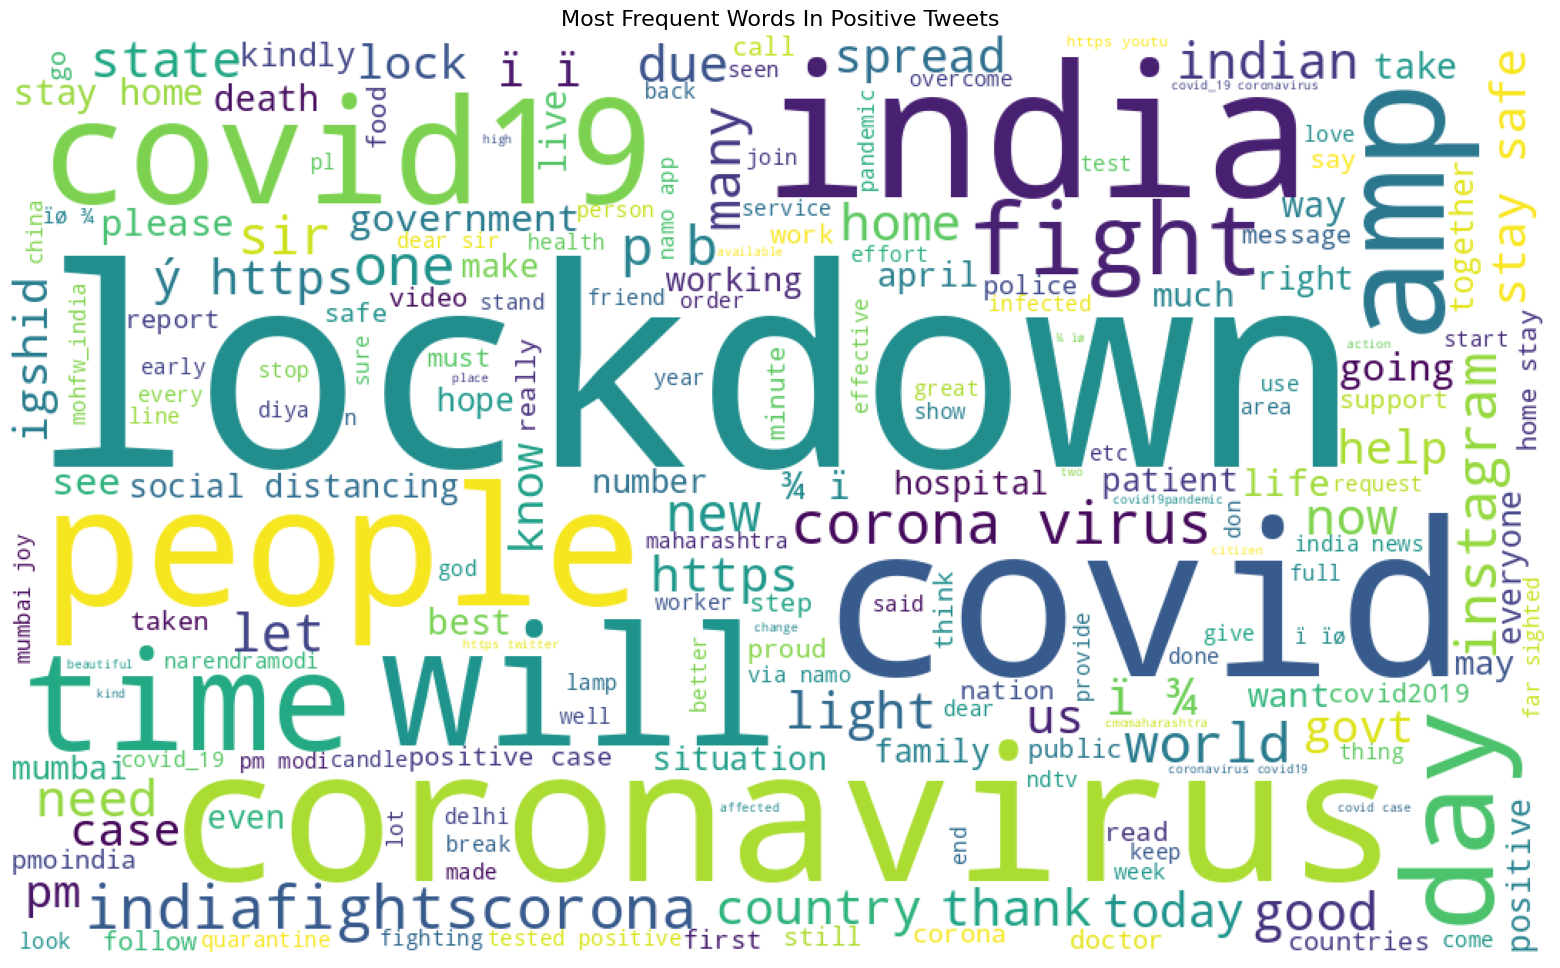

In [86]:
plt.figure(figsize=(20, 12))

plt.imshow(WordCloud(width=1000, height=600, background_color='white', stopwords=STOP_WORDS).generate(
    ' '.join(positive_tweets.Text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Positive Tweets', fontsize=16)
plt.show()

In [87]:
negative_tweets = df[df['score'] == 'negative']

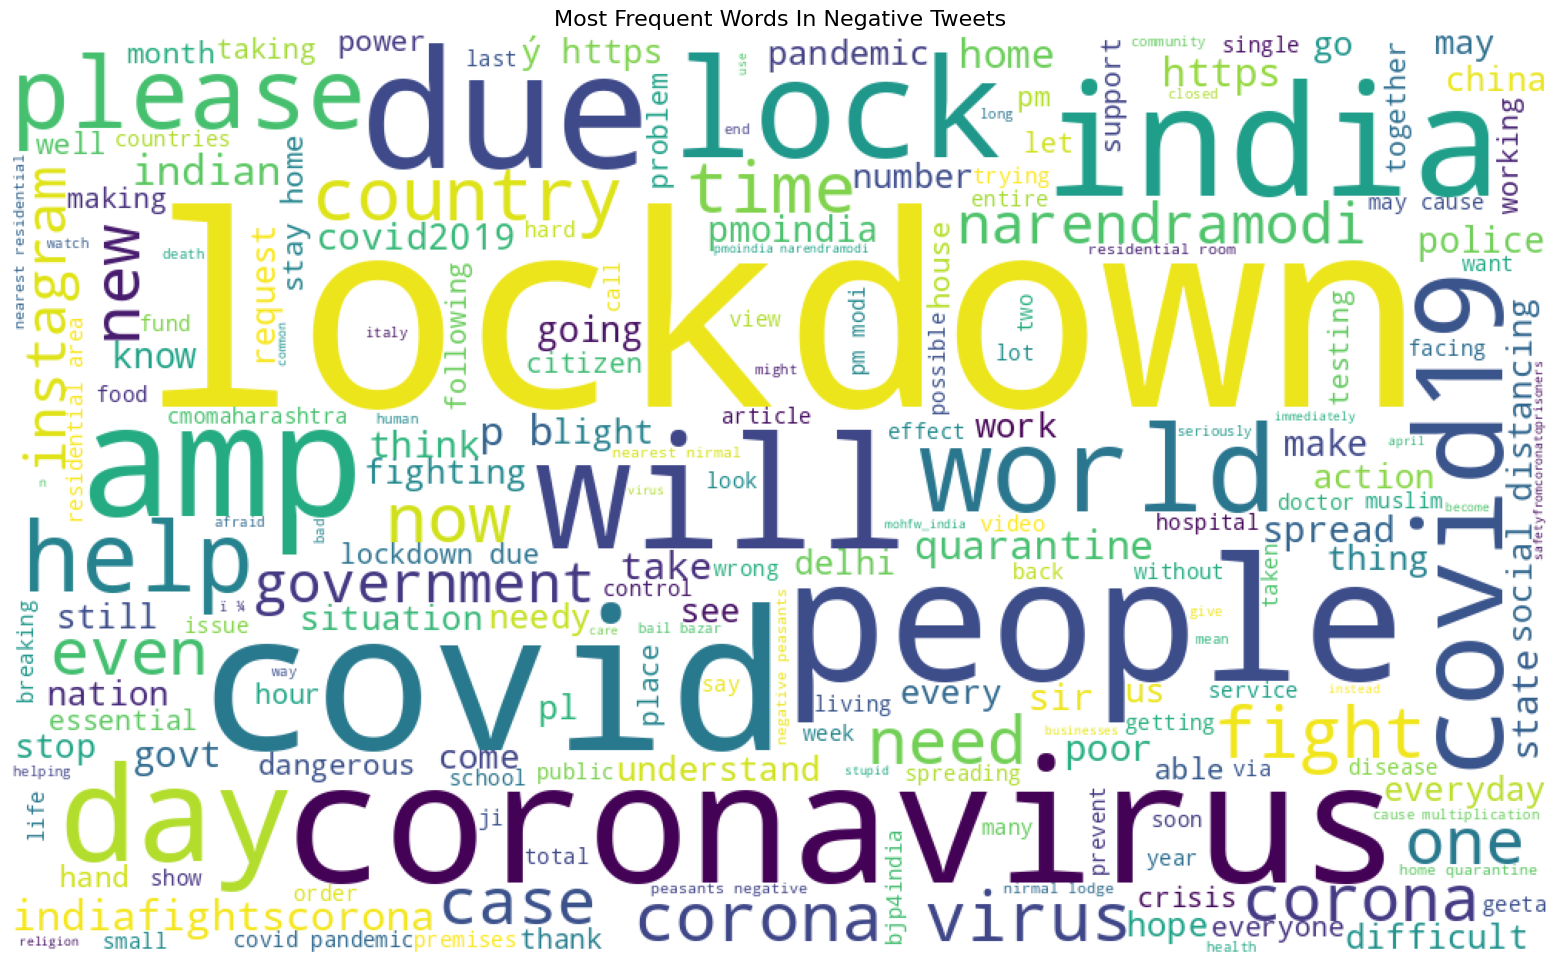

In [88]:
plt.figure(figsize=(20, 12))
plt.imshow(WordCloud(width=1000, height=600, background_color='white', stopwords=STOP_WORDS).generate(
    ' '.join(negative_tweets.Text.values)))
plt.axis('off')
plt.title('Most Frequent Words In Negative Tweets', fontsize=16)
plt.show()

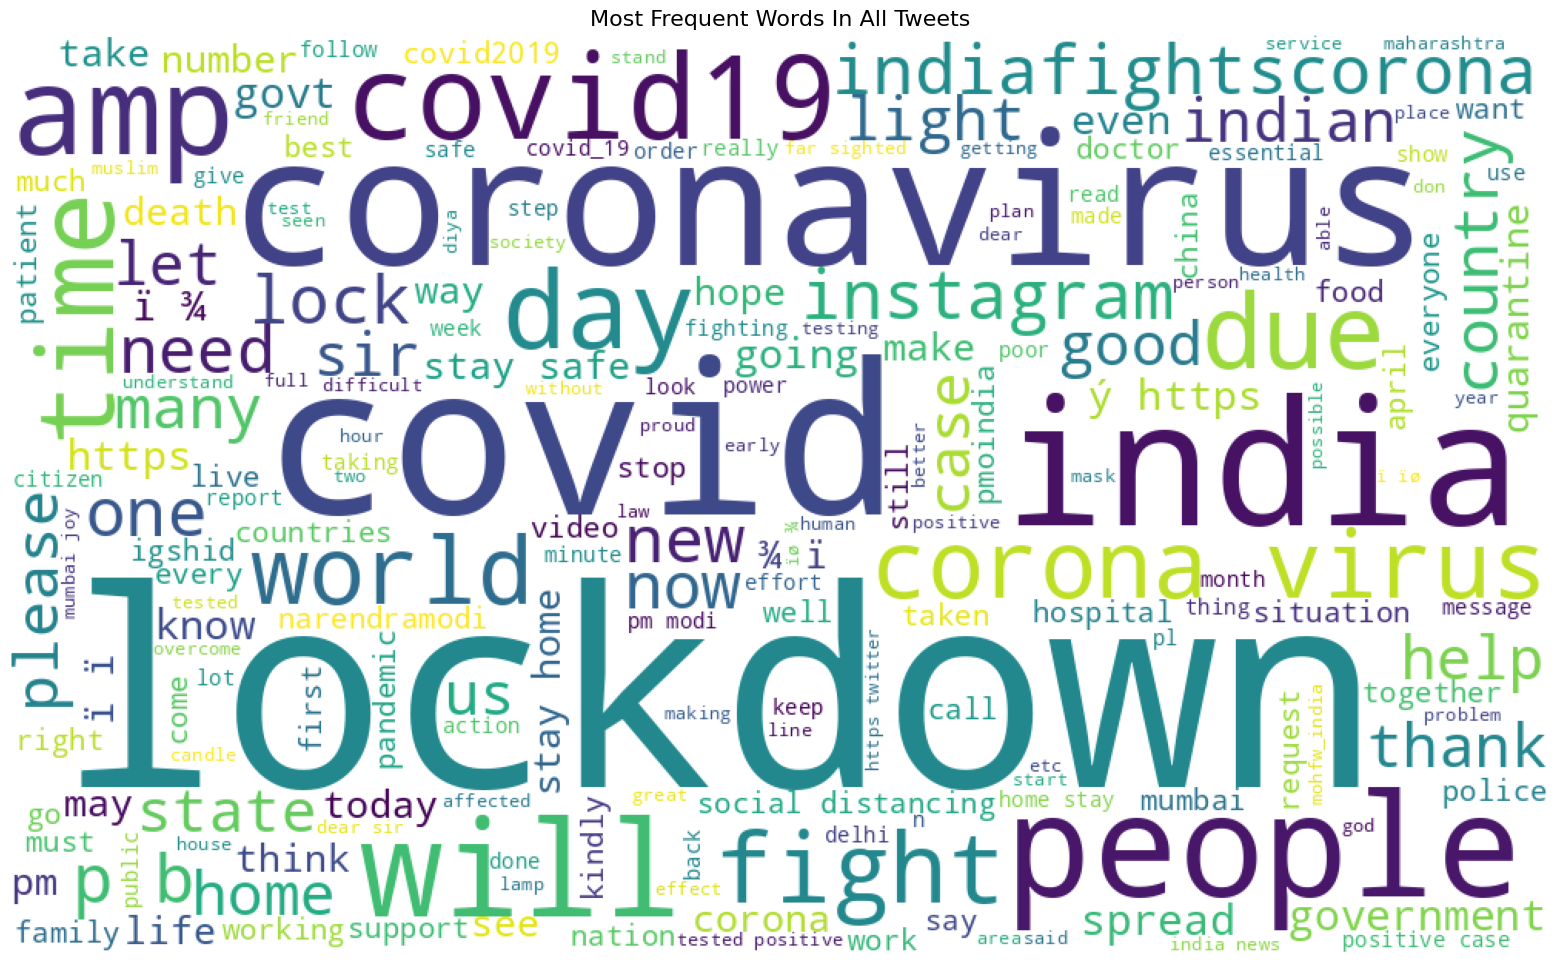

In [89]:
plt.figure(figsize=(20, 12))
plt.imshow(WordCloud(width=1000, height=600, background_color='white', stopwords=STOP_WORDS).generate(
    ' '.join(df.Text .values)))
plt.axis('off')
plt.title('Most Frequent Words In All Tweets', fontsize=16)
plt.show()